<a href="https://colab.research.google.com/github/arpit000000/Advance_python_notes/blob/main/customerClustor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arpit Jadon
2201331540051
DS-A

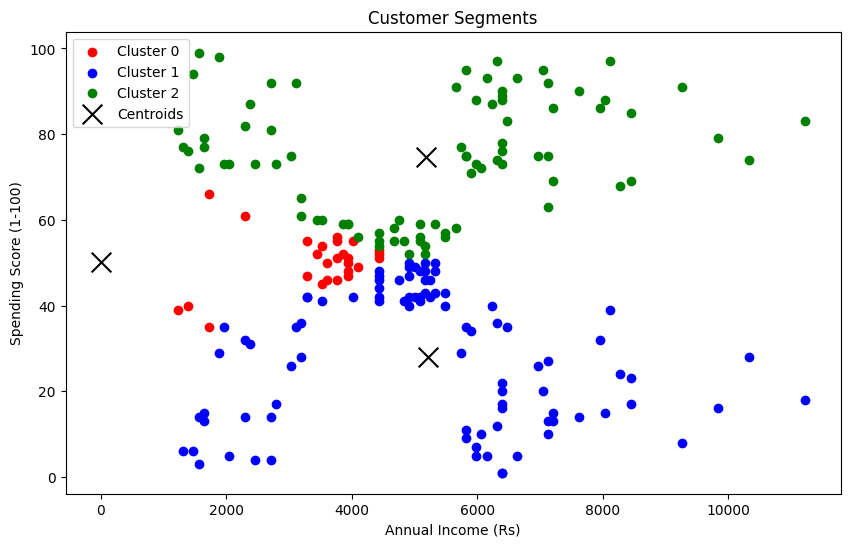

Enter the customer's details:
Annual Income (Rs): 5000
Spending Score (1-100): 76

The customer belongs to Cluster 2.


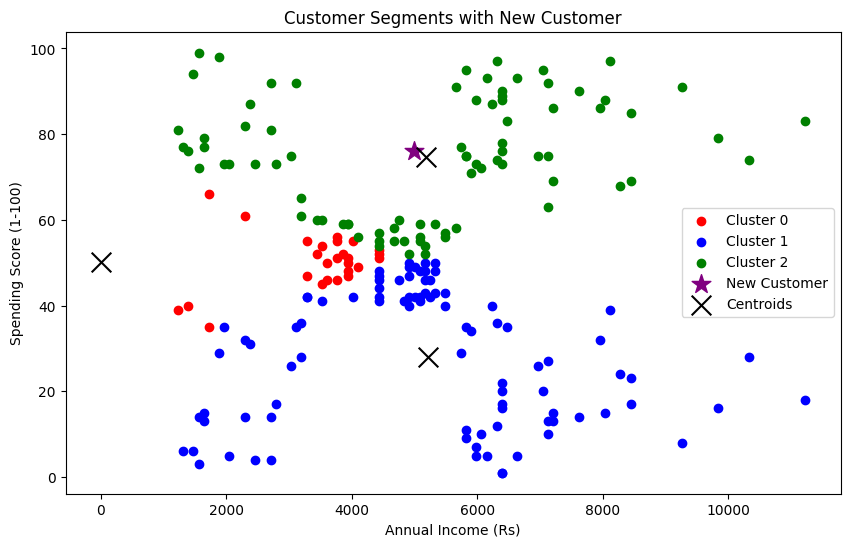

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_excel(r"/content/Mall_Customers.xlsx")

X = df[['Annual Income (Rs)', 'Spending Score (1-100)']]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

def visualize_clusters(df, kmeans, scaler):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green']

    for cluster in range(3):
        plt.scatter(
            df[df['Cluster'] == cluster]['Annual Income (Rs)'],
            df[df['Cluster'] == cluster]['Spending Score (1-100)'],
            color=colors[cluster],
            label=f'Cluster {cluster}'
        )

    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(
        centers[:, 0], centers[:, 1],
        color='black', marker='x', s=200, label='Centroids'
    )


    plt.title('Customer Segments')
    plt.xlabel('Annual Income (Rs)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()


def predict_new_customer(kmeans, scaler):
    print("Enter the customer's details:")
    annual_income = float(input("Annual Income (Rs): "))
    spending_score = float(input("Spending Score (1-100): "))
    customer_data = scaler.transform([[annual_income, spending_score]])
    cluster_label = kmeans.predict(customer_data)[0]
    print(f"\nThe customer belongs to Cluster {cluster_label}.")

    return annual_income, spending_score, cluster_label


visualize_clusters(df, kmeans, scaler)


annual_income, spending_score, cluster_label = predict_new_customer(kmeans, scaler)


plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']

for cluster in range(3):
    plt.scatter(
        df[df['Cluster'] == cluster]['Annual Income (Rs)'],
        df[df['Cluster'] == cluster]['Spending Score (1-100)'],
        color=colors[cluster],
        label=f'Cluster {cluster}'
    )


plt.scatter(
    annual_income, spending_score,
    color='purple', marker='*', s=200, label='New Customer'
)


centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], centers[:, 1],
    color='black', marker='x', s=200, label='Centroids'
)

plt.title('Customer Segments with New Customer')
plt.xlabel('Annual Income (Rs)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [11]:
df = pd.read_excel(r'/content/Mall_Customers.xlsx')
print(df.head())
print(df.columns)

   Annual Income (Rs)  Spending Score (1-100)
0                1230                    39.0
1                1230                    81.0
2                1312                     6.0
3                1312                    77.0
4                1394                    40.0
Index(['Annual Income (Rs)', 'Spending Score (1-100)'], dtype='object')


In [16]:
print("Contain null: ",df.isnull().sum())

Contain null:  Annual Income (Rs)              0
Spending Score (1-100)    1048375
Cluster                         0
dtype: int64


In [18]:
X = df[['Annual Income (Rs)', 'Spending Score (1-100)']]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df['Cluster'] = clusters


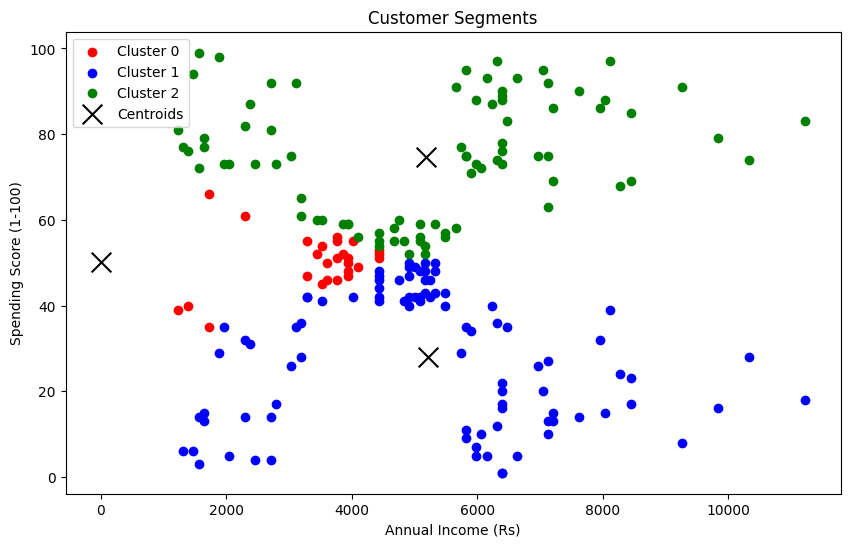

In [20]:
def visualize_clusters(df, kmeans, scaler):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green']

    for cluster in range(3):
        plt.scatter(
            df[df['Cluster'] == cluster]['Annual Income (Rs)'],
            df[df['Cluster'] == cluster]['Spending Score (1-100)'],
            color=colors[cluster],
            label=f'Cluster {cluster}'
        )

    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(
        centers[:, 0], centers[:, 1],
        color='black', marker='x', s=200, label='Centroids'
    )

    plt.title('Customer Segments')
    plt.xlabel('Annual Income (Rs)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

visualize_clusters(df, kmeans, scaler)


In [21]:
def predict_new_customer(kmeans, scaler):
    print("Enter the customer's details:")
    annual_income = float(input("Annual Income (Rs): "))
    spending_score = float(input("Spending Score (1-100): "))
    customer_data = scaler.transform([[annual_income, spending_score]])
    cluster_label = kmeans.predict(customer_data)[0]
    print(f"\nThe customer belongs to Cluster {cluster_label}.")

    return annual_income, spending_score, cluster_label

annual_income, spending_score, cluster_label = predict_new_customer(kmeans, scaler)


Enter the customer's details:
Annual Income (Rs): 5000
Spending Score (1-100): 34

The customer belongs to Cluster 1.


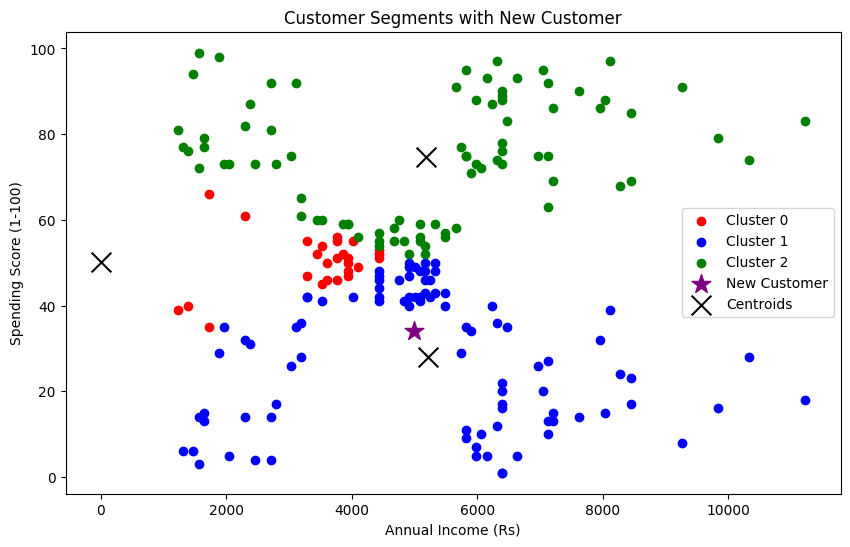

In [22]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']

for cluster in range(3):
    plt.scatter(
        df[df['Cluster'] == cluster]['Annual Income (Rs)'],
        df[df['Cluster'] == cluster]['Spending Score (1-100)'],
        color=colors[cluster],
        label=f'Cluster {cluster}'
    )


plt.scatter(
    annual_income, spending_score,
    color='purple', marker='*', s=200, label='New Customer'
)


centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], centers[:, 1],
    color='black', marker='x', s=200, label='Centroids'
)

plt.title('Customer Segments with New Customer')
plt.xlabel('Annual Income (Rs)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
